# Predictive modeling of customer bookings

In this project, I would be building a predictive model to predict a customer booking a ticket with British Airways. First, spend time exploring the dataset provided and understanding the different columns and some basic statistics of the dataset. Then, I would consider how to prepare the dataset for a predictive model. in a task like this, you should think about any new features you want to create in order to make your model even better.  When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


Lets start with importing necessary librabies and reading in the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.


Now we can explore the data extensively and learn what each column is about

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

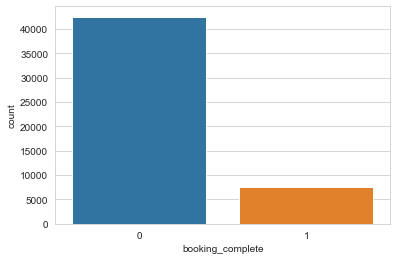

In [5]:
sns.countplot(data = df, x='booking_complete')

This is a very large data set but unfortunately very skewed, a careful feature engineering would have to be done to find patters that lead to booking ticket, if not cases like this tend to lead to a very biased model that would just predict 0 for everything

<AxesSubplot:xlabel='num_passengers', ylabel='count'>

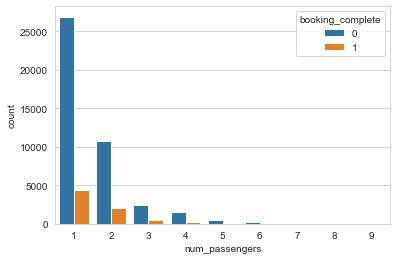

In [6]:
sns.countplot(data = df, x='num_passengers',hue = 'booking_complete')

Looks like most people booking are singles and couples, only a very few families traveling together

In [7]:
df.num_passengers.value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [9]:
df.groupby('num_passengers')['booking_complete'].mean()*100 #this gives the percentage of each that actually book a ticket

num_passengers
1    14.209620
2    16.018432
3    16.695002
4    15.414798
5    19.429590
6    18.685121
7    15.789474
8    13.483146
9    19.696970
Name: booking_complete, dtype: float64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

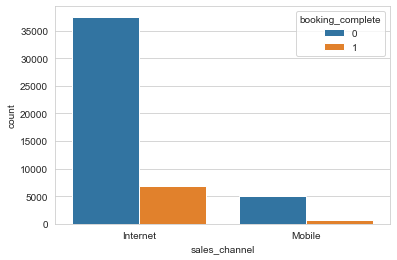

In [10]:
sns.countplot(data = df, x='sales_channel',hue = 'booking_complete')#alot more people are using and booking on the internet

<AxesSubplot:xlabel='trip_type', ylabel='count'>

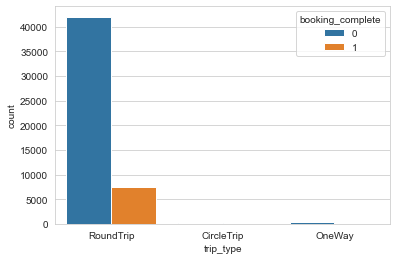

In [11]:
sns.countplot(data = df, x='trip_type',hue = 'booking_complete')

In [12]:
df.trip_type.value_counts() #A whole lot more people book round trip

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [13]:
df.groupby('trip_type')['booking_complete'].mean()*100 # barely anyone books a circle trip

trip_type
CircleTrip     4.310345
OneWay         5.167959
RoundTrip     15.057478
Name: booking_complete, dtype: float64

In [14]:
df[df['trip_type']!='RoundTrip']['booking_complete'].sum()

25

The code above shows that only 25 people out of over 7000 people that booked dont book a round trip, this feature might have to be dropped, as it doesnt tell the model much

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchase_lead'>

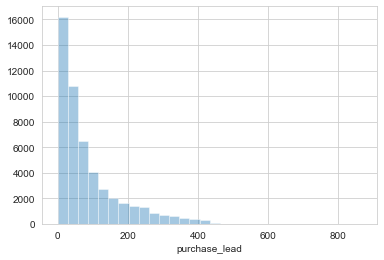

In [15]:
sns.distplot(df['purchase_lead'],kde=False,bins=30)

This shows how many days to departure date that a person books the flight, its okay to see 1- 200 days, but 800? lets check that out

In [16]:
df.sort_values('purchase_lead',ascending = False).head(40)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
8770,2,Internet,RoundTrip,584,45,11,Sun,DELSYD,India,1,1,0,8.58,0
2058,2,Internet,RoundTrip,577,26,9,Mon,AKLKUL,New Zealand,0,0,0,8.83,0


This is quite hard to believe seeing a person book a flight 867 days away, it could be a mistake

<AxesSubplot:xlabel='booking_complete', ylabel='purchase_lead'>

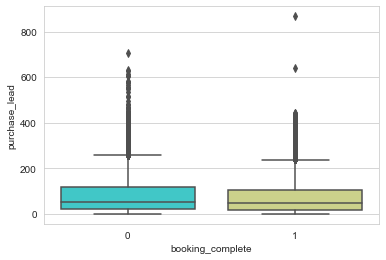

In [17]:
sns.boxplot(x="booking_complete", y="purchase_lead", data=df,palette='rainbow')

To not confuse our model, i would be removing the outliers and setting a benchmark of 600

In [18]:
df.drop([48259,24119,835,38356,39417,6148,46716,42916], axis = 0, inplace = True)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_of_stay'>

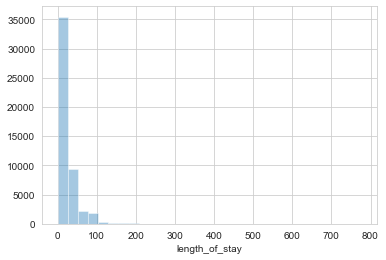

In [19]:
sns.distplot(df['length_of_stay'],kde=False,bins=30)

Same situation here, length of stay of 800 days?

In [20]:
df.sort_values('length_of_stay',ascending = False).head(40)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
10821,1,Internet,RoundTrip,102,778,8,Wed,DPSMEL,Australia,0,0,0,8.83,1
22081,2,Internet,RoundTrip,11,773,16,Sat,OOLTPE,Taiwan,1,0,1,8.83,0
10294,1,Internet,RoundTrip,10,610,2,Mon,DMKSYD,Australia,1,1,0,8.58,0
1583,2,Internet,RoundTrip,32,603,0,Thu,AKLKUL,Malaysia,0,0,0,8.83,0
24154,1,Internet,RoundTrip,367,577,2,Mon,PNHSYD,Australia,0,0,1,8.58,0
21582,1,Internet,RoundTrip,9,573,11,Thu,OOLPNH,Australia,1,1,1,8.83,0
13214,1,Internet,RoundTrip,20,532,11,Thu,HYDPER,India,1,0,1,5.62,0
23179,1,Internet,RoundTrip,65,517,14,Tue,PERPNH,Australia,1,1,1,5.62,0
13439,1,Mobile,RoundTrip,18,513,10,Sat,HYDSYD,India,1,1,1,8.58,0
14828,1,Internet,RoundTrip,112,510,23,Thu,IKAMEL,Australia,1,1,1,8.83,0


<AxesSubplot:xlabel='booking_complete', ylabel='length_of_stay'>

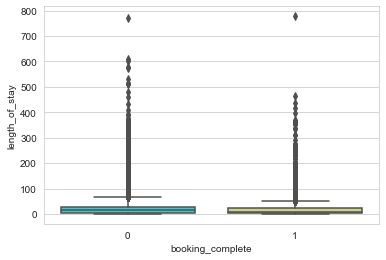

In [21]:
sns.boxplot(x="booking_complete", y="length_of_stay", data=df,palette='rainbow')

once again i would be setting a bench mark of 600

In [22]:
df.drop([10821,22081,10294,1583], axis = 0, inplace = True)

<AxesSubplot:xlabel='flight_hour', ylabel='count'>

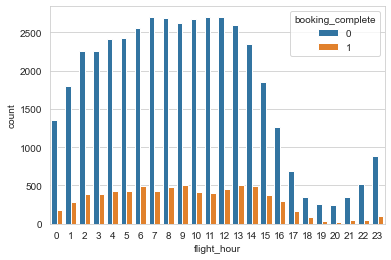

In [23]:
sns.countplot(data = df, x='flight_hour',hue = 'booking_complete')

Looks like these people dont like night flight for some reason

<AxesSubplot:xlabel='flight_day', ylabel='count'>

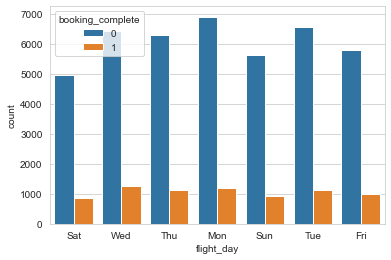

In [24]:
sns.countplot(data = df, x='flight_day',hue = 'booking_complete')

No much difference accross the days, however theres less traveling on the weekends

In [25]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

Can you see that 'not set', basically saying a null value

In [27]:
df.booking_origin.nunique()

104

In [26]:
df['booking_origin'].value_counts(ascending = False).head(50)

Australia               17867
Malaysia                 7172
South Korea              4559
Japan                    3884
China                    3387
Indonesia                2369
Taiwan                   2076
Thailand                 2030
India                    1269
New Zealand              1074
Singapore                1044
United States             455
Vietnam                   388
Macau                     304
Hong Kong                 295
Philippines               266
United Kingdom            173
Brunei                    167
Cambodia                  132
(not set)                  84
Sri Lanka                  73
France                     59
Italy                      58
Canada                     57
Germany                    57
Myanmar (Burma)            50
Netherlands                46
Mauritius                  44
United Arab Emirates       42
Nepal                      40
Bangladesh                 36
Saudi Arabia               36
Russia                     32
Spain     

the 'not set' are just 84 occurence, so they would be removed

In [28]:
df['booking_origin'] = df['booking_origin'].replace('(not set)',np.nan)

In [29]:
df = df.dropna()

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='count'>

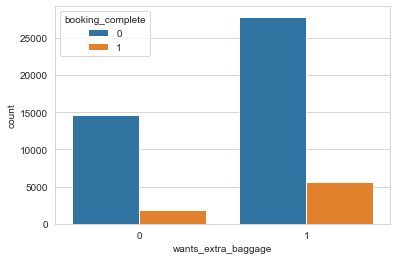

In [31]:
sns.countplot(data = df, x='wants_extra_baggage',hue = 'booking_complete')

<AxesSubplot:xlabel='wants_preferred_seat', ylabel='count'>

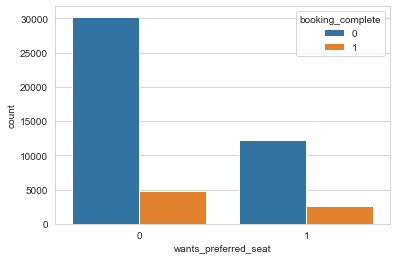

In [32]:
sns.countplot(data = df, x='wants_preferred_seat',hue = 'booking_complete')

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='count'>

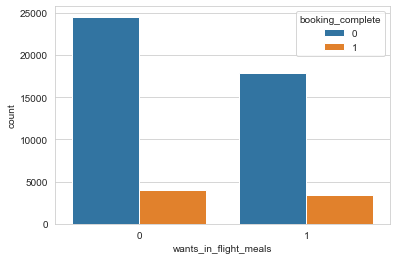

In [33]:
sns.countplot(data = df, x='wants_in_flight_meals',hue = 'booking_complete')

<AxesSubplot:xlabel='flight_duration', ylabel='count'>

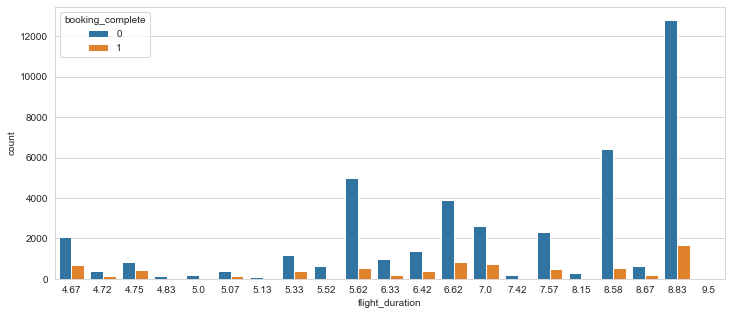

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x='flight_duration',hue = 'booking_complete')


In [39]:
df.groupby('flight_duration')['booking_complete'].mean()*100

flight_duration
4.67    24.571011
4.72    24.048096
4.75    33.413078
4.83    12.258065
5.00    24.166667
5.07    23.668639
5.13    22.400000
5.33    24.983735
5.52     7.796102
5.62     9.501360
6.33    16.386555
6.42    21.445087
6.62    17.158006
7.00    21.833284
7.42    14.798206
7.57    17.613837
8.15     0.325733
8.58     7.774105
8.67    23.420074
8.83    11.625500
9.50    13.513514
Name: booking_complete, dtype: float64

# Feature Engineering

### route

In [40]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


We can see route is a variable that tells the origin and destination of the flight

But it appears as codes of 6 letters, I am guessing the first 3 represent the origin(departure), while the last 3 represent the destination. So the first thing you would want to do is split the route into those 2

In [41]:
df['departure'] = df['route'].apply(lambda x : x[:3])

In [42]:
df['arrival'] = df['route'].apply(lambda x : x[3:])

In [45]:
df.departure.unique()

array(['AKL', 'AOR', 'BBI', 'BDO', 'BKI', 'BLR', 'BOM', 'BTJ', 'BTU',
       'BWN', 'CAN', 'CCU', 'CEB', 'CGK', 'CKG', 'CMB', 'CNX', 'COK',
       'CRK', 'CSX', 'CTS', 'CTU', 'CXR', 'DAC', 'DAD', 'DEL', 'DMK',
       'DPS', 'GOI', 'HAN', 'HDY', 'HGH', 'HKG', 'HKT', 'HND', 'HYD',
       'ICN', 'IKA', 'JED', 'JHB', 'JOG', 'KBR', 'KBV', 'KCH', 'KHH',
       'KIX', 'KLO', 'KNO', 'KOS', 'KTM', 'KWL', 'LBU', 'LGK', 'LOP',
       'LPQ', 'MAA', 'MEL', 'MFM', 'MLE', 'MNL', 'MRU', 'MYY', 'NRT',
       'OOL', 'PEK', 'PEN', 'PER', 'PNH', 'PNK', 'PUS', 'PVG', 'REP',
       'RGN', 'SBW', 'SDK', 'SGN', 'SIN', 'SRG', 'SUB', 'SYD', 'TGG',
       'TPE', 'TRZ', 'TWU', 'URT'], dtype=object)

I googled these codes and they turn out to be airport codes and their respective locations

Meaning with the codes we can get the country of departure and arrival

To this i went online to find a table of codes and respective countries and i found just that from https://www.nationsonline.org/oneworld/IATA_Codes/airport_code_list.htm

The table is included as a text file in readme

In [46]:
column_names = ['city', 'country', 'code']
airport_codes = pd.read_csv('IATA codes', sep='\t', names=column_names)
        

In [47]:
airport_codes.drop('city', axis = 1, inplace = True)
airport_codes = airport_codes.drop_duplicates()
airport_codes = airport_codes.dropna()

In [48]:
airport_codes

,country,code
0,Denmark,AAR
1,Iran,ABD
2,Chad,AEH
3,United Kingdom,ABZ
4,USA,ABR
...,...,...
1980,Spain,ZAZ
1981,Pakistan,PZH
1982,Niger,ZND
1983,Mauritania,OUZ


Now i need to turn this into a dictionary so i can easily map it to the codes in my df

In [49]:
dict_airport_codes = airport_codes.set_index('code')['country']
dict_airport_codes= dict(dict_airport_codes)
dict_airport_codes

{'AAR': 'Denmark',
 'ABD': 'Iran',
 'AEH': 'Chad',
 'ABZ': 'United Kingdom',
 'ABR': 'USA',
 'ABJ': "Cote d'Ivoire",
 'ABI': 'USA',
 'AUH': 'United Arab Emirates',
 'ABV': 'Nigeria',
 'AUE': 'Egypt',
 'ABS': 'Egypt',
 'ACA': 'Mexico',
 'ACC': 'Ghana',
 'ADA': 'Turkey',
 'ADD': 'Ethiopia',
 'ADL': 'Australia',
 'ADE': 'Yemen',
 'ADF': 'Turkey',
 'AER': 'Russia',
 'AJY': 'Niger',
 'AGA': 'Morocco',
 'SUM': 'Guam',
 'AGZ': 'South Africa',
 'BQN': 'Puerto Rico',
 'AGU': 'Mexico',
 'AMD': 'India',
 'AYU': 'Papua New Guinea',
 'AJA': 'France',
 'AXT': 'Japan',
 'CAK': 'USA',
 'AKT': 'Cyprus',
 'AAN': 'United Arab Emirates',
 'AAC': 'Egypt',
 'ALH': 'Australia',
 'ABY': 'USA',
 'ALB': 'USA',
 'LBI': 'France',
 'AAL': 'Denmark',
 'ABQ': 'USA',
 'ABX': 'Australia',
 'ACI': 'Channel Islands',
 'ALP': 'Syria',
 'AES': 'Norway',
 'ALJ': 'South Africa',
 'HBH': 'Egypt',
 'ALY': 'Egypt',
 'ESF': 'USA ',
 'ALG': 'Algeria',
 'AHU': 'Morocco',
 'ALC': 'Spain',
 'ASP': 'Australia',
 'ADY': 'South Africa

In [50]:
df['arrival'] = df['arrival'].map(dict_airport_codes)

In [51]:
df['departure'] = df['departure'].map(dict_airport_codes)

Now we have done this, we have created extra features to work with

Another idea i am getting is to check if the departure country is the same as the booking country. I feel theres a higher tendency for a person to book a ticket if the person is booking from the same area of departure. This new column would show 1 if they are the same location and 0 if not. The column would be 'departure_origin', or rather 'dep_origin' for short

But before i can carry this out i need to make sure the countries in the booking origin are written in the same way it is written under arrival and departure, if not i would have to do some replacing

In [52]:
df['departure'].unique()

array(['New Zealand', nan, 'India', 'Indonesia', 'Malaysia', 'Brunei',
       'Guangdong, PR China', 'Philippines', 'Sichuan, PR China',
       'Sri Lanka', 'Thailand', 'Japan', 'Bangladesh', 'Vietnam',
       'Zhejiang, PR China', 'Hong Kong', 'Saudi Arabia', 'Taiwan',
       'Nepal', 'Guangxi, PR China', 'Australia', 'Macau, China SAR',
       'Maledives', 'Mauritius', 'China', 'Cambodia', 'South Korea',
       'Myanmar', 'Viet Nam', 'Singapore'], dtype=object)

In [53]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', 'Saudi Arabia', 'Netherlands', 'Qatar',
       'Hong Kong', 'Philippines', 'Sri Lanka', 'France', 'Croatia',
       'United States', 'Laos', 'Hungary', 'Portugal', 'Cyprus',
       'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman', 'Bangladesh',
       'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan', 'Brunei',
       'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia', 'Iran',
       'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius', 'Nepal',
       'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria', 'Lebanon',
       'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania', 'Peru',
       'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (Burma)', 'Nor

In [54]:
df['arrival'].unique()

array(['India', 'Zhejiang, PR China', 'Japan', nan, 'Nepal', 'Malaysia',
       'Mauritius', 'China', 'Taiwan', 'Australia', 'Sichuan, PR China',
       'South Korea', 'Shaanxi, PR China', 'Saudi Arabia',
       'Hubei, PR China', 'Indonesia', 'Cambodia', 'Singapore',
       'Thailand', 'Viet Nam', 'Hong Kong', 'Macau, China SAR',
       'Philippines', 'Guangdong, PR China', 'Maledives', 'Myanmar',
       'Lao PDR'], dtype=object)

Under booking origin, there is only China, but in arrival and departure there are provinces of China. i would have to replace all those with just China. Also Vietnam, Maldives, Myanmar, Lao PDR are all written differently and would have tto be replaced

In [55]:
df['arrival'] = df['arrival'].replace({'Guangdong, PR China':'China' , 'Viet Nam':'Vietnam' , np.nan:'South Korea' ,
                            'Lao PDR':'Laos' , 'Maledives':'Maldives' , 'Myanmar':'Myanmar (Burma)' , 
                            'Sichuan, PR China':'China', 'Zhejiang, PR China':'China' , 'Shaanxi, PR China':'China' , 
                                    'Macau, China SAR':'China' , 'Hubei, PR China':'China'})

In [56]:
df['departure'] = df['departure'].replace({'Guangdong, PR China':'China','Viet Nam':'Vietnam',np.nan:'South Korea',
                                            'Maledives':'Maldives','Myanmar':'Myanmar (Burma)','Sichuan, PR China':'China',
                                   'Zhejiang, PR China':'China','Guangxi, PR China':'China','Macau, China SAR':'China'})

Now he have done this, we can go ahead to set up the 'dep_origin' as discussed above

In [57]:
df['dep_origin'] = (df['booking_origin']==df['departure']).astype(int)

In [58]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,dep_origin
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,New Zealand,India,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,New Zealand,India,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,New Zealand,India,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,New Zealand,India,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,New Zealand,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia,1
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,Australia,Cambodia,1
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,Australia,Cambodia,1
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia,1


<AxesSubplot:xlabel='dep_origin', ylabel='count'>

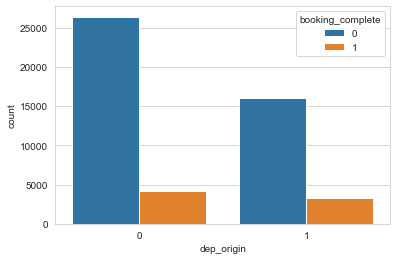

In [59]:
sns.countplot(data = df, x='dep_origin',hue = 'booking_complete')


In [60]:
df.groupby('dep_origin')['booking_complete'].mean()*100

dep_origin
0    13.593377
1    17.094857
Name: booking_complete, dtype: float64

As suspected those that booked from the same location of departure have a higher chance of booking

In [61]:
df.booking_origin.value_counts(ascending = True).head(60)

Svalbard & Jan Mayen    1
Lebanon                 1
Panama                  1
Bhutan                  1
Norfolk Island          1
Nicaragua               1
Egypt                   1
Tonga                   1
Slovakia                1
Algeria                 1
Papua New Guinea        1
Tanzania                1
Estonia                 1
Paraguay                1
Afghanistan             1
Bulgaria                1
Czechia                 1
Malta                   1
Vanuatu                 1
Belarus                 1
Pakistan                1
Iraq                    1
Ghana                   1
Gibraltar               1
Guatemala               1
Seychelles              1
Jordan                  1
Solomon Islands         2
Cyprus                  2
Slovenia                2
Israel                  2
Timor-Leste             2
Tunisia                 2
Guam                    2
Croatia                 2
Hungary                 3
Kenya                   3
South Africa            3
Kazakhstan  

Under the booking_origin column, there are alot of countries that appear just a very few times as seen above as compared to the ones with thousands and hundreds of counts. Individually these lesser ones wont make much sense, so i would group them together unde 'others'

In [62]:
country_counts = df['booking_origin'].value_counts() #get the value count
countries_to_replace = country_counts[country_counts<8].index.tolist() #get the index of the values with less than 8 counts
df['booking_origin'] = df['booking_origin'].replace(countries_to_replace,'others') #replace them with 'others'

In [63]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,dep_origin
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,New Zealand,India,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,New Zealand,India,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,New Zealand,India,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,New Zealand,India,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,New Zealand,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia,1
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,Australia,Cambodia,1
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,Australia,Cambodia,1
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia,1


Another feature engineering i do in any project is to make sure my numerical features such as 'purchase_lead' and 'length_of_stay' have a 'normal gaussian distribution'

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchase_lead'>

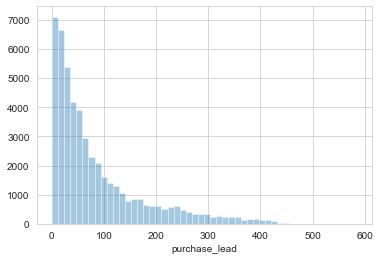

In [76]:
sns.distplot(df['purchase_lead'],kde=False) 


As you can see the result is very skewed. the idea is to create a normal distribution. I do this with power transformation. this raises it to a power that gives a suitable distribution, i try different numbers so feel free to play around with it

<AxesSubplot:xlabel='purchase_lead'>

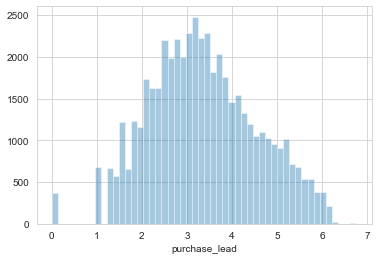

In [77]:
sns.distplot(df['purchase_lead']**0.3,kde=False)

In [78]:
df['purchase_lead'] = df['purchase_lead']**0.3

<AxesSubplot:xlabel='length_of_stay'>

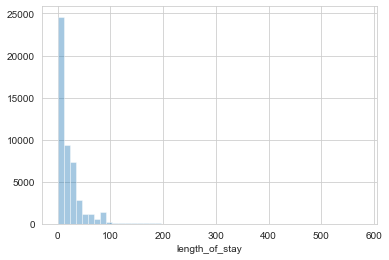

In [79]:
sns.distplot(df['length_of_stay'],kde=False)

<AxesSubplot:xlabel='length_of_stay'>

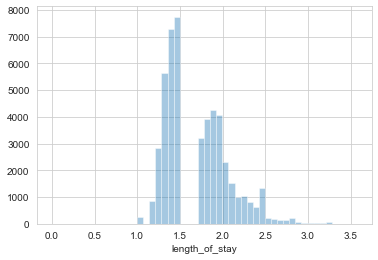

In [80]:
sns.distplot(df['length_of_stay']**0.2,kde=False)

In [81]:
df['length_of_stay'] = df['length_of_stay']**0.2

### Converting Categorical features

In the case of 'booking_origin','departure' and 'arrival' i have thought of a way to replace the strings with integers, insteading of changing to dummy variables or hot encoding. In this method, i would get the likelihood of a person booking a ticket in each country, and replace the countries by that value

In [64]:
#getting the liklihood of a person in a country in booking_origin to book a ticket and turning it into a dataframe
x = df.groupby('booking_origin')['booking_complete'].mean()
x = pd.DataFrame(x)
x = x.reset_index()
x

,booking_origin,booking_complete
0,Australia,0.050316
1,Austria,0.000000
2,Bangladesh,0.055556
3,Brazil,0.000000
4,Brunei,0.245509
5,Cambodia,0.272727
6,Canada,0.035088
7,Chile,0.058824
8,China,0.204901
9,Czech Republic,0.125000


In [65]:
#turning the dataframe to a dictionary so i can easily map it to booking_origin
dict_booking_origin = x.set_index('booking_origin')['booking_complete']
dict_booking_origin = dict(dict_booking_origin)
dict_booking_origin

{'Australia': 0.05031622544355516,
 'Austria': 0.0,
 'Bangladesh': 0.05555555555555555,
 'Brazil': 0.0,
 'Brunei': 0.24550898203592814,
 'Cambodia': 0.2727272727272727,
 'Canada': 0.03508771929824561,
 'Chile': 0.058823529411764705,
 'China': 0.20490109241216417,
 'Czech Republic': 0.125,
 'Finland': 0.0,
 'France': 0.23728813559322035,
 'Germany': 0.21052631578947367,
 'Hong Kong': 0.24745762711864408,
 'India': 0.10323089046493301,
 'Indonesia': 0.2596032081046855,
 'Iran': 0.0,
 'Ireland': 0.0,
 'Italy': 0.1896551724137931,
 'Japan': 0.12281153450051494,
 'Kuwait': 0.2222222222222222,
 'Laos': 0.24,
 'Macau': 0.3125,
 'Malaysia': 0.3439765755716676,
 'Maldives': 0.0,
 'Mauritius': 0.09090909090909091,
 'Mexico': 0.1111111111111111,
 'Mongolia': 0.0,
 'Myanmar (Burma)': 0.26,
 'Nepal': 0.075,
 'Netherlands': 0.043478260869565216,
 'New Zealand': 0.05027932960893855,
 'Oman': 0.3333333333333333,
 'Philippines': 0.2819548872180451,
 'Poland': 0.0,
 'Qatar': 0.3333333333333333,
 'Russia

In [66]:
df['booking_origin'] = df['booking_origin'].map(dict_booking_origin)

Now to do the same for arrival and departure

In [67]:
y = df.groupby('arrival')['booking_complete'].mean()
y = pd.DataFrame(y)
y = y.reset_index()

In [68]:
dict_arrival = y.set_index('arrival')['booking_complete']
dict_arrival = dict(dict_arrival)
dict_arrival

{'Australia': 0.08787122137810126,
 'Cambodia': 0.09911504424778761,
 'China': 0.22109933448360858,
 'Hong Kong': 0.0,
 'India': 0.07096774193548387,
 'Indonesia': 0.15164835164835164,
 'Japan': 0.2077922077922078,
 'Laos': 0.14705882352941177,
 'Malaysia': 0.2454719481666912,
 'Maldives': 0.26991150442477874,
 'Mauritius': 0.08602150537634409,
 'Myanmar (Burma)': 0.09621993127147767,
 'Nepal': 0.35034013605442177,
 'Philippines': 0.19287833827893175,
 'Saudi Arabia': 0.2,
 'Singapore': 0.14684014869888476,
 'South Korea': 0.137122969837587,
 'Taiwan': 0.17224287484510534,
 'Thailand': 0.2159709618874773,
 'Vietnam': 0.09037212049616067}

In [69]:
df['arrival'] = df['arrival'].map(dict_arrival)

In [70]:
z = df.groupby('departure')['booking_complete'].mean()
z = pd.DataFrame(z)
z = z.reset_index()

In [71]:
dict_departure = z.set_index('departure')['booking_complete']
dict_departure = dict(dict_departure)
dict_departure

{'Australia': 0.08817103620474406,
 'Bangladesh': 0.01675977653631285,
 'Brunei': 0.1715686274509804,
 'Cambodia': 0.1564625850340136,
 'China': 0.19575253924284394,
 'Hong Kong': 0.1676190476190476,
 'India': 0.06428571428571428,
 'Indonesia': 0.17054772056411938,
 'Japan': 0.1887983171180647,
 'Malaysia': 0.29490920881971466,
 'Maldives': 0.025974025974025976,
 'Mauritius': 0.15217391304347827,
 'Myanmar (Burma)': 0.014492753623188406,
 'Nepal': 0.25872442839951865,
 'New Zealand': 0.20049243756595145,
 'Philippines': 0.1346578366445916,
 'Saudi Arabia': 0.09090909090909091,
 'Singapore': 0.19827586206896552,
 'South Korea': 0.12622024319232744,
 'Sri Lanka': 0.028704422032583398,
 'Taiwan': 0.04411764705882353,
 'Thailand': 0.10050625372245384,
 'Vietnam': 0.11166253101736973}

In [72]:
df['departure'] = df['departure'].map(dict_departure)

In [74]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,dep_origin
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,0.050279,1,0,0,5.52,0,0.200492,0.070968,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,0.050279,0,0,0,5.52,0,0.200492,0.070968,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,0.103231,1,1,0,5.52,0,0.200492,0.070968,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,0.050279,0,0,1,5.52,0,0.200492,0.070968,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,0.103231,1,0,1,5.52,0,0.200492,0.070968,0


I will also map the flight_day with numbers

In [75]:
dict_flight_day = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}

df["flight_day"] = df["flight_day"].map(dict_flight_day)

In [82]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,dep_origin
0,2,Internet,RoundTrip,5.314842,1.801983,7,6,AKLDEL,0.050279,1,0,0,5.52,0,0.200492,0.070968,1
1,1,Internet,RoundTrip,4.118750,1.820564,3,6,AKLDEL,0.050279,0,0,0,5.52,0,0.200492,0.070968,1
2,2,Internet,RoundTrip,5.196152,1.855601,17,3,AKLDEL,0.103231,1,1,0,5.52,0,0.200492,0.070968,0
3,1,Internet,RoundTrip,3.932614,1.987341,4,6,AKLDEL,0.050279,0,0,1,5.52,0,0.200492,0.070968,1
4,2,Internet,RoundTrip,3.546114,1.855601,15,3,AKLDEL,0.103231,1,0,1,5.52,0,0.200492,0.070968,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,2.687875,1.430969,9,6,PERPNH,0.050316,1,0,1,5.62,0,0.088171,0.099115,1
49996,1,Internet,RoundTrip,4.107683,1.430969,4,7,PERPNH,0.050316,0,0,0,5.62,0,0.088171,0.099115,1
49997,1,Internet,RoundTrip,2.594558,1.430969,22,6,PERPNH,0.050316,0,0,1,5.62,0,0.088171,0.099115,1
49998,1,Internet,RoundTrip,2.253343,1.430969,11,1,PERPNH,0.050316,1,0,1,5.62,0,0.088171,0.099115,1


Let me remove the columns i would no longer be using and the ones that have been transformed, like route. I would also be droping trip_type, it doesnt help the model as i gave the reason above.It is like having a feature where everything on that column is the same, it doesnt make sense

In [83]:
df.drop(['trip_type','route'], axis = 1, inplace = True)

Since 'sales_channel' contains just 2 variables, i would replace them with 1 and 0

In [86]:
df['sales_channel'] = df['sales_channel'].replace(['Internet', 'Mobile'],[1, 0])

In [87]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,dep_origin
0,2,1,5.314842,1.801983,7,6,0.050279,1,0,0,5.52,0,0.200492,0.070968,1
1,1,1,4.118750,1.820564,3,6,0.050279,0,0,0,5.52,0,0.200492,0.070968,1
2,2,1,5.196152,1.855601,17,3,0.103231,1,1,0,5.52,0,0.200492,0.070968,0
3,1,1,3.932614,1.987341,4,6,0.050279,0,0,1,5.52,0,0.200492,0.070968,1
4,2,1,3.546114,1.855601,15,3,0.103231,1,0,1,5.52,0,0.200492,0.070968,0


In [88]:
df = df.reset_index(drop=True)

Now our data is fully ready to be modelled

### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df.drop('booking_complete',axis=1)
Y = df['booking_complete']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [95]:
X_train.shape

(39923, 14)

In [91]:
from sklearn.preprocessing import MinMaxScaler #It is important to scale or normalize your data

In [100]:
scaler = MinMaxScaler()

Because of how skewed the data set is, I am going to use SMOTE to create synthetic features and balance up the target class

In [96]:
import imblearn
from imblearn.over_sampling import SMOTE

In [97]:
smote = SMOTE(sampling_strategy='auto' , random_state=42)

In [98]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [99]:
X_train_resampled.shape

(67884, 14)

In [101]:
X_train_resampled = scaler.fit_transform(X_train_resampled)

In [102]:
X_test = scaler.transform(X_test)

### Using a RandomforestClassifier 

In [103]:
from sklearn.ensemble import RandomForestClassifier


In [104]:
class_weights = {0: 1.0, 1: 5.25}  # Adjust the weight for class 1 as needed

In [105]:
clf = RandomForestClassifier(class_weight=class_weights, random_state=42)

In [106]:
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight={0: 1.0, 1: 5.25}, random_state=42)

Lets Evaluate how well our model is doing

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
y_pred = clf.predict(X_test)

In [109]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8501
           1       0.45      0.24      0.31      1480

    accuracy                           0.84      9981
   macro avg       0.66      0.59      0.61      9981
weighted avg       0.81      0.84      0.82      9981



Lets try to change some paraneters in the model and run it again

In [110]:
clf = RandomForestClassifier(class_weight=class_weights, random_state=42,max_depth=None, min_samples_leaf= 1,
                               min_samples_split= 2, n_estimators = 300)

In [111]:
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight={0: 1.0, 1: 5.25}, n_estimators=300,
                       random_state=42)

In [112]:
y_pred = clf.predict(X_test)

In [113]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      8501
           1       0.46      0.24      0.32      1480

    accuracy                           0.85      9981
   macro avg       0.67      0.60      0.61      9981
weighted avg       0.82      0.85      0.82      9981



In [114]:
print(confusion_matrix(y_test, y_pred))

[[8078  423]
 [1124  356]]


In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

In [122]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))
print('f1-score : {}'.format(f1_score(y_test, y_pred)))
print('Precision : {}'.format(precision_score(y_test, y_pred)))
print('Recall : {}'.format(recall_score(y_test, y_pred)))

Accuracy : 0.8450055104698928
f1-score : 0.3151837096060204
Precision : 0.45699614890885754
Recall : 0.24054054054054055


Lets visualise the best features with a .barh()

In [123]:
best_features = clf.feature_importances_.argsort()


Text(0.5, 0, 'Random Forest Feature Importance')

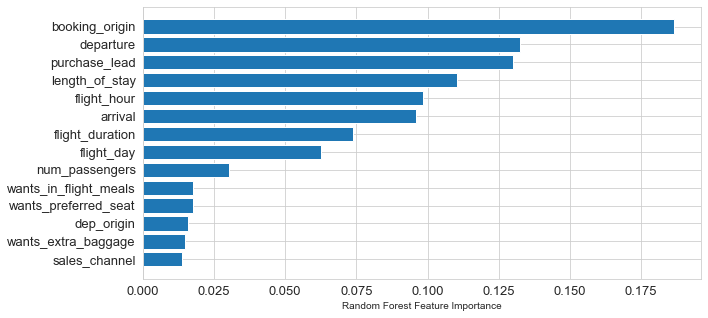

In [124]:
plt.figure(figsize=(10,5))

plt.barh(X.columns[best_features], clf.feature_importances_[best_features])
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.xlabel("Random Forest Feature Importance")

This comes to the end of thisproject. The model is not a good predictor of those that completed the booking. Obvious reasons being that theres no clear feature that shows what makes a customer complete a booking and also the fact that the data set is really skewed so naturally there would be a bias in the model to predict more of 0.

You can explore with other models and play around with the parameters, possibly do more feature engineering too, the sky is the limit in machine learning

Feel free to reach out for questions or contributions